# Introduction

Here we show a fully differentiable propostional reasoning system. We demonstrate that the system captures the inherent structure in propositional reasoning by using a dataset with consistent and inconsistent formulae.  


## Architecture

In [1865]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [1866]:
train = pd.read_csv("./train",header=None, names= ["id","c1","c2","c3", "c4", "c5"])

In [1867]:
test = pd.read_csv("./test",header=None, names= ["id","c1","c2","c3", "c4","c5"])

In [1868]:
def getProblem(id):
    problemChunk = train[train["id"]== ("P" + str(id))][["c1", "c2", "c3", "c4", "c5"]]
    return (problemChunk[0:len(problemChunk)-1].values.astype(float), problemChunk["c5"].values[5])
  
def getTestProblem(id):
    problemChunk = test[test["id"]== ("P" + str(id))][["c1", "c2", "c3", "c4", "c5"]]
    return (problemChunk[0:len(problemChunk)-1].values.astype(float), problemChunk["c5"].values[5])
    

In [1869]:
def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def reason1(formulae, weights):
    W = weights[0:5,:]
    A = weights[5:10,:]
    C = weights[10:15,:]
    for d in range(0, 5):
        f1 = np.matmul(formulae, W)
        formulae = np.add(formulae, np.dot(A, f1))
        f2 = np.matmul(formulae, W)
        formulae = np.add(formulae, np.dot(A, f2))
        c = sigmoid(np.add(f2, np.dot(f1, C)))
        formulae = np.add(formulae, np.dot(A, c))
    return sigmoid(np.log(np.linalg.norm(formulae)))

def reason(formulae, weights):
    W = weights[0:5,:]
    A = weights[5:10,:]
    C = weights[10:15,:]
    for d in range(0, 5):
        f1 = np.matmul(formulae, W)
        formulae = np.add(formulae, np.dot(A, f1))
        f2 = np.matmul(formulae, W)
        formulae = np.add(formulae, np.dot(A, f2))
        c = sigmoid(np.add(f2, np.dot(f1, C)))
        formulae = np.add(formulae, np.dot(A, c))
    return sigmoid(np.log(np.linalg.norm(formulae)))
    
    

In [1870]:
W = np.random.randn(5,5)
A = np.random.randn(5,5)
C = np.random.randn(5,5)

In [1871]:
weights = np.vstack([W, A, C])

In [1872]:
def training_loss(weights):
    sumT = 0
    # Training loss is the negative log-likelihood of the training labels.
    for i in range(0, 100):
        problem = getProblem(np.random.randint(0,1000))
        target = problem[1]
        formulae = problem[0]
        pred = reason(formulae, weights)

        sumT = sumT  - np.log(pred * target + (1 - pred) * (1 - target))
        
    return sumT/100


In [1876]:
def perf(weights):
    sumT = 0
    # Training loss is the negative log-likelihood of the training labels.
    for i in range(0, 1000):
        problem = getTestProblem(i)
        target = problem[1]
        formulae = problem[0]
        pred = reason(formulae, weights)

        sumT = sumT  - np.log(pred * target + (1 - pred) * (1 - target))
        
    return sumT/1000

In [1877]:
training_gradient_fun = grad(training_loss)

In [1878]:
print("Initial loss:", training_loss(weights))

Initial loss: 0.110685450749


In [1879]:
perf_losses = np.zeros(200)
for i in range(200):    
    weights -= training_gradient_fun(weights) * 0.20* (1 - i/200)
    perf_losses[i] = perf(weights)

KeyboardInterrupt: 

In [1757]:
print("Trained loss:", training_loss(weights))

Trained loss: 0.274129037849


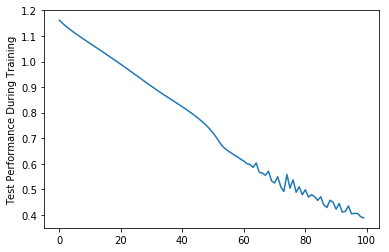

In [1758]:
plt.plot(perf_losses)
plt.ylabel('Test Performance During Training')
plt.show()


In [1743]:
def groundPerf():
    sumT = 0
    # Training loss is the negative log-likelihood of the training labels.
    for i in range(0, 100):
        problem = getTestProblem(i)
        target = problem[1]
        formulae = problem[0]
        pred = problem[1]

        sumT = sumT  - np.log(pred * target + (1 - pred) * (1 - target))
        
    return sumT/100

In [1744]:
groundPerf()

0.0